In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.preprocessing import StandardScaler
import pickle
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

## Carga de datos train

In [2]:
df = pd.read_csv("../data/train/train.csv")
df.head()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,4.862270,2.471408,0,0,9.788456,0
1,28.316033,5.021810,0,0,2.873132,0
2,27.204428,3.819500,1,0,2.150132,0
3,6.177355,0.036686,0,0,2.570051,1
4,6.847389,9.246352,1,0,1.814942,1


In [3]:
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

## Entrenamiento de modelos

### Prueba con modelo neuronal

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)

In [5]:
capas = [
    keras.layers.Flatten(input_dim=(5)),
    keras.layers.Dense(units = 3, activation='relu'),
    keras.layers.Dense(units = 1, activation='sigmoid'),]

model = keras.models.Sequential(capas)

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.01),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.Recall()])

model.fit(X_train_st, y_train, batch_size = 100, epochs = 30, validation_split = 0.10)

c:\Users\Rebeca\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.5054 - recall: 0.4059 - val_loss: 0.4952 - val_recall: 0.5424
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4607 - recall: 0.5960 - val_loss: 0.4754 - val_recall: 0.6441
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4415 - recall: 0.7020 - val_loss: 0.4675 - val_recall: 0.7288
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4293 - recall: 0.7459 - val_loss: 0.4607 - val_recall: 0.7288
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4195 - recall: 0.7605 - val_loss: 0.4522 - val_recall: 0.7797
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4103 - recall: 0.7477 - val_loss: 0.4402 - val_recall: 0.7288
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4005 - recall: 0.7477 - val_loss: 0.4300 - val_recall: 0.7288
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3925 - recall: 0.7587 - val_loss: 0.4230 - val_recall: 0.7288
Epoch 9/30
16/16 ━━━━━

## Carga de datos test

In [6]:
df_test = pd.read_csv("../data/test/test.csv")

In [7]:
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

In [8]:
X_test_st = scaler.transform(X_test)

In [9]:
evaluacion = model.evaluate(X_test_st, y_test)
evaluacion

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3183 - recall: 0.8312 


[0.3183295726776123, 0.8311688303947449]

In [15]:
pred = model.predict(X_test_st).round(0)
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

In [18]:
print("Recall:", recall_score(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))
print("CM:", confusion_matrix(y_test, pred))
print("Report:", classification_report(y_test, pred))

Recall: 0.8311688311688312
Accuracy: 0.8860465116279069
CM: [[253  23]
 [ 26 128]]
Report:               precision    recall  f1-score   support

           0       0.91      0.92      0.91       276
           1       0.85      0.83      0.84       154

    accuracy                           0.89       430
   macro avg       0.88      0.87      0.88       430
weighted avg       0.89      0.89      0.89       430



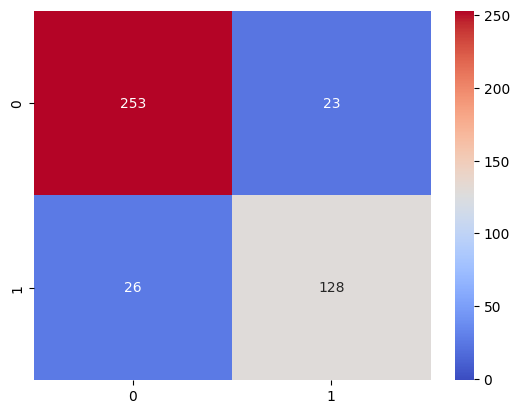

In [21]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Guardado de modelo con pickle

In [20]:
pickle.dump(scaler, open("../models/08_scaler.pkl", "wb"))
model.save("../models/08_model_sequencial.keras")
